_Lambda School Data Science — Tree Ensembles_ 

# Decision Trees Assignment

## Part 1: House Price Regression

Apply decision trees to the Ames housing dataset you've worked with this week!

- Try multiple features
- Try features you've engineered
- Try different `max_depth` paramaters
- What's the best Test Root Mean Squared Error you can get? *Share with your cohort on Slack!*
- What's a cool visualization you can make? *Share with your cohort on Slack!*

**Importing**

In [0]:
%matplotlib inline
import graphviz
from IPython.display import display
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [0]:
def viz3D(fitted_model, df, feature1, feature2, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    return fig

In [0]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
ames_df = pd.read_csv(url)

**Cleaned and Revised **

In [0]:
encoded = {'Gd':4, 'TA':2, 'Ex':5, 'Fa':3, np.NaN:0,'Po':1}
# Basement
ames_df['BsmtQual'] = ames_df['BsmtQual'].replace(encoded)
ames_df['BsmtCond'] = ames_df['BsmtCond'].replace(encoded)
# External Quality and Condition
ames_df['ExterQual'] = ames_df['ExterQual'].replace(encoded)
ames_df['ExterCond'] = ames_df['ExterCond'].replace(encoded)
# Lot Info
ames_df['LotFrontage'] = ames_df['LotFrontage'].fillna(ames_df['LotFrontage'].mean())
ames_df['LandSlope'] = ames_df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1})
ames_df['Foundation'] = ames_df['Foundation'].replace({'Slab':5,'PConc':4,'CBlock':3,'Stone':2,'BrkTil':1,'Wood':0})
ames_df['Street'] = ames_df['Street'].replace({'Grvl':0,'Pave':1})
ames_df['LandContour'] = ames_df['LandContour'].replace({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
ames_df['LotShape'] = ames_df['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
ames_df['ln_SalePrice'] = np.log(ames_df['SalePrice'])
# Dropping Nans
ames_df = ames_df.dropna(subset=['GarageYrBlt','MasVnrArea'])
# Fireplace
ames_df['FireplaceQu'] = ames_df['FireplaceQu'].replace(encoded)
# Garage
ames_df['GarageQual'] = ames_df['GarageQual'].replace(encoded)
ames_df['GarageCond'] = ames_df['GarageCond'].replace(encoded)
ames_df['GarageFinish'] = ames_df['GarageFinish'].replace({'Fin':2,'RFn':1,np.NaN:0,'Unf':-1})
ames_df['PavedDrive'] = ames_df['PavedDrive'].replace({'Y':1,'P':0,'N':-1})
# Pool
ames_df['PoolQC'] = ames_df['PoolQC'].replace(encoded)
# Heating / Cooling / Electrical
ames_df['HeatingQC'] = ames_df['HeatingQC'].replace(encoded)
ames_df['CentralAir'] = ames_df['CentralAir'].replace({'Y':1,'N':0})
ames_df['Electrical'] = ames_df['Electrical'].replace({'SBrkr':3,'FuseA':2,'FuseF':1,'FuseP':0,'Mix':2.5,np.NaN:2.5})
# Kitchen
ames_df['KitchenQual'] = ames_df['KitchenQual'].replace(encoded)
ames_df = ames_df[ames_df.describe().columns]

**Decision Tree With 1 Feature**

In [39]:
target = 'SalePrice'
features = ['OverallQual']
x = ames_df[features]
y = ames_df[target]
tree = DecisionTreeRegressor()
tree.fit(x, y)
print("R-Squared:", tree.score(x, y))

R-Squared: 0.6757639237611366


In [0]:
# Splitting into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=42)

In [41]:
for depth in range(1,16):
    tree = DecisionTreeRegressor(max_depth=depth)
    # Fitting Model
    tree.fit(x_train, y_train)
    # Calculating RMSE
    RMSE = (np.sqrt(mean_squared_error(y_test, tree.predict(x_test))))
    # Displaying Results
    print('max_depth: {} \t model score: {} \t Test RMSE: {}'
          .format(depth, tree.score(x, y), RMSE))

max_depth: 1 	 model score: 0.459175484241908 	 Test RMSE: 58186.08185258325
max_depth: 2 	 model score: 0.6337782266538097 	 Test RMSE: 47343.229465128104
max_depth: 3 	 model score: 0.6674084306891497 	 Test RMSE: 44339.08760739454
max_depth: 4 	 model score: 0.6738996511317161 	 Test RMSE: 44150.12692067689
max_depth: 5 	 model score: 0.6747313584379155 	 Test RMSE: 43950.040987742585
max_depth: 6 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 7 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 8 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 9 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 10 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 11 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 12 	 model score: 0.6750569748411536 	 Test RMSE: 43885.93783511206
max_depth: 13 	 model score: 0.6750569748411536 	 Test RMSE:

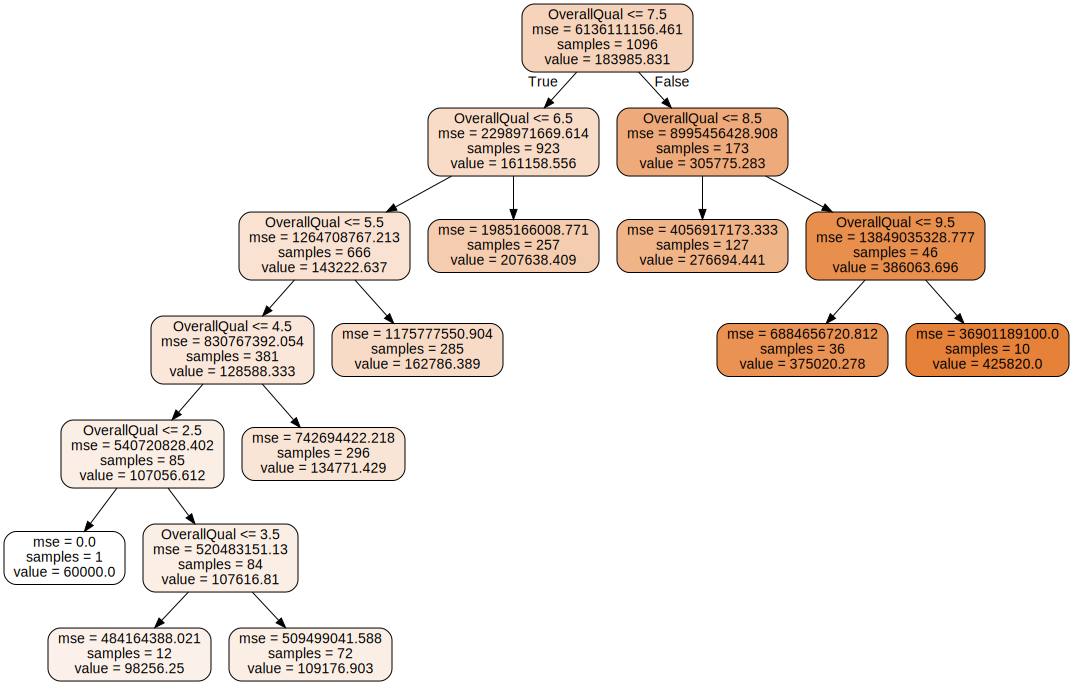

In [8]:
# Decision Tree
display(viztree(tree, features))

**Try Multiple Features**

In [11]:
ames_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Foundation', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'ln_SalePrice'],
      dtype='object')

In [13]:
target = ['SalePrice']
features = ['YearBuilt', 'OverallQual', 'GarageCars',
            'OverallCond', 'BedroomAbvGr']
x2 = ames_df[features]
y2 = ames_df['SalePrice']
tree = DecisionTreeRegressor()
tree.fit(x2, y2)
print("R-Squared:", tree.score(x2, y2))

R-Squared: 0.937154658029643


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size=0.80, test_size=0.20, random_state=42)

In [15]:
for depth in range(1,20):
    tree = DecisionTreeRegressor(max_depth=depth)
    # Fitting
    tree.fit(x_train, y_train)
    # Calculating RMSE
    RMSE = (np.sqrt(mean_squared_error(y_test, tree.predict(x_test))))
    # Displaying Results
    print('max_depth: {} \t model score: {} \t Test RMSE: {}'
          .format(depth, tree.score(x2, y2), RMSE))

max_depth: 1 	 model score: 0.459175484241908 	 Test RMSE: 58186.08185258325
max_depth: 2 	 model score: 0.6337782266538097 	 Test RMSE: 47343.229465128104
max_depth: 3 	 model score: 0.7009229178871061 	 Test RMSE: 44898.31820521612
max_depth: 4 	 model score: 0.744620191324092 	 Test RMSE: 47001.796267005266
max_depth: 5 	 model score: 0.7699919709352873 	 Test RMSE: 47239.83104090388
max_depth: 6 	 model score: 0.7865325001822092 	 Test RMSE: 49242.22528929915
max_depth: 7 	 model score: 0.8066535351620794 	 Test RMSE: 49451.27230918966
max_depth: 8 	 model score: 0.8159297966739921 	 Test RMSE: 52946.17816051602
max_depth: 9 	 model score: 0.8263277971510314 	 Test RMSE: 54493.34853322165
max_depth: 10 	 model score: 0.8343049757926349 	 Test RMSE: 55098.41716035566
max_depth: 11 	 model score: 0.8354256483900275 	 Test RMSE: 57012.65345046461
max_depth: 12 	 model score: 0.8388382118497442 	 Test RMSE: 57101.32044245275
max_depth: 13 	 model score: 0.8420146773524078 	 Test RMSE: 

In [0]:
# Run the cell to see tree...sorry
display(viztree(tree, features))



---



In [18]:
# Best Score So Far...
target = ['SalePrice']
features = ['YearBuilt', 'YearRemodAdd', 'LotArea', 'TotRmsAbvGrd']
x3 = ames_df[features]
y3 = ames_df[target]
tree = DecisionTreeRegressor()
tree.fit(x3, y3)
print("R-Squared:", tree.score(x3, y3))

R-Squared: 0.9998196727377842


In [0]:
# Splitting into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.80, test_size=0.20, random_state=42)

In [20]:
for depth in range(1,20):
    tree = DecisionTreeRegressor(max_depth=depth)
    # Fitting the Model
    tree.fit(x_train, y_train)
    # Calculating RMSE
    rmse = (np.sqrt(mean_squared_error(y_test, tree.predict(x_test))))
    # Displaying Results
    print('max_depth: {} \t model score: {} \t Test RMSE: {}'
          .format(depth, tree.score(x3, y3), RMSE))

max_depth: 1 	 model score: 0.3173299388756933 	 Test RMSE: 66503.61941739704
max_depth: 2 	 model score: 0.48532771694159593 	 Test RMSE: 59734.842595585804
max_depth: 3 	 model score: 0.5602504456008203 	 Test RMSE: 58271.622820421355
max_depth: 4 	 model score: 0.6211957385182199 	 Test RMSE: 55141.955691258954
max_depth: 5 	 model score: 0.6688998353053892 	 Test RMSE: 53702.888392139714
max_depth: 6 	 model score: 0.7255372716235553 	 Test RMSE: 53360.341736592505
max_depth: 7 	 model score: 0.774374964985747 	 Test RMSE: 51224.3718593822
max_depth: 8 	 model score: 0.7907128063107065 	 Test RMSE: 55828.58174512123
max_depth: 9 	 model score: 0.8198272004657738 	 Test RMSE: 55722.677294363966
max_depth: 10 	 model score: 0.8370021196126392 	 Test RMSE: 56289.307244445685
max_depth: 11 	 model score: 0.8503544749884518 	 Test RMSE: 58569.5433990881
max_depth: 12 	 model score: 0.8640797737212775 	 Test RMSE: 58123.30316869852
max_depth: 13 	 model score: 0.8613915669500785 	 Test R

In [0]:
# Run to see tree..
display(viztree(tree, features))



---



In [22]:
# Nevermind...this score is great
target = ['SalePrice']
features = ['LotArea','OverallQual', 'OverallCond',
           'YearBuilt','TotRmsAbvGrd']
x4 = ames_df[features]
y4 = ames_df[target]
tree = DecisionTreeRegressor()
tree.fit(x4, y4)
print("R-Squared:", tree.score(x4, y4))

R-Squared: 0.9998744499881178


In [0]:
# Splitting into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x4, y4, train_size=0.80, test_size=0.20, random_state=42)

In [24]:
for depth in range(1,20):
    tree = DecisionTreeRegressor(max_depth=depth)
    # Fitting the model
    tree.fit(x_train, y_train)
    # Calculating RMSE
    RMSE = (np.sqrt(mean_squared_error(y_test, tree.predict(x_test))))
    # Displaying Results
    print('max_depth: {} \t model score: {} \t Test RMSE: {}'
          .format(depth, tree.score(x4, y4), RMSE))

max_depth: 1 	 model score: 0.459175484241908 	 Test RMSE: 58186.08185258325
max_depth: 2 	 model score: 0.6337782266538097 	 Test RMSE: 47343.229465128104
max_depth: 3 	 model score: 0.701837357489313 	 Test RMSE: 46115.18508651876
max_depth: 4 	 model score: 0.7448467944002726 	 Test RMSE: 48658.655137915805
max_depth: 5 	 model score: 0.7835444019761124 	 Test RMSE: 47900.354060962665
max_depth: 6 	 model score: 0.8155161140936822 	 Test RMSE: 47171.59348823174
max_depth: 7 	 model score: 0.8411377156791489 	 Test RMSE: 46715.70723962649
max_depth: 8 	 model score: 0.8562026376559555 	 Test RMSE: 48685.11864795951
max_depth: 9 	 model score: 0.8730968874798769 	 Test RMSE: 49324.54351771941
max_depth: 10 	 model score: 0.8861161101995043 	 Test RMSE: 50246.8106160047
max_depth: 11 	 model score: 0.8979245224746931 	 Test RMSE: 49591.341937085155
max_depth: 12 	 model score: 0.9088454129600784 	 Test RMSE: 47904.46678778556
max_depth: 13 	 model score: 0.9062252756370612 	 Test RMSE:

In [0]:
# Run to see tree
display(viztree(tree, features))

## Part 2 / Stretch: "Play Tennis" Classification

We'll reproduce the "Play Tennis" example from Ross Quinlan's 1986 paper, [Induction of Decison Trees](https://link.springer.com/content/pdf/10.1007%2FBF00116251.pdf).

[According to Wikipedia](https://en.wikipedia.org/wiki/Ross_Quinlan), "John Ross Quinlan is a computer science researcher in data mining and decision theory. He has contributed extensively to the development of decision tree algorithms, including inventing the canonical C4.5 and ID3 algorithms."

#### "Table 1 shows a small training set"

In [45]:
import pandas as pd

columns = 'No. Outlook Temperature Humidity Windy PlayTennis'.split()

raw = """1 sunny hot high false N
2 sunny hot high true N
3 overcast hot high false P
4 rain mild high false P
5 rain cool normal false P
6 rain cool normal true N
7 overcast cool normal true P
8 sunny mild high false N
9 sunny cool normal false P
10 rain mild normal false P
11 sunny mild normal true P
12 overcast mild high true P
13 overcast hot normal false P
14 rain mild high true N"""

data = [row.split() for row in raw.split('\n')]
tennis = pd.DataFrame(data=data, columns=columns).set_index('No.')
tennis['PlayTennis'] = (tennis['PlayTennis'] == 'P').astype(int)

tennis

,Outlook,Temperature,Humidity,Windy,PlayTennis
No.,,,,,
1,sunny,hot,high,false,0
2,sunny,hot,high,true,0
3,overcast,hot,high,false,1
4,rain,mild,high,false,1
5,rain,cool,normal,false,1
6,rain,cool,normal,true,0
7,overcast,cool,normal,true,1
8,sunny,mild,high,false,0
9,sunny,cool,normal,false,1


#### "A decision tree that correctly classifies each object in the training set is given in Figure 2."

<img src="https://i.imgur.com/RD7d0u0.png" height="300">

In this dataset, the tennis player decided to play on 64% of the days, and decided not to on 36% of the days.

In [46]:
tennis['PlayTennis'].value_counts(normalize=True) * 100

1    64.285714
0    35.714286
Name: PlayTennis, dtype: float64

The tennis player played on 100% of the overcast days, 40% of the sunny days, and 60% of the  rainy days

In [47]:
tennis.groupby('Outlook')['PlayTennis'].mean() * 100

Outlook
overcast    100.0
rain         60.0
sunny        40.0
Name: PlayTennis, dtype: float64

On sunny days, the tennis player's decision depends on the humidity. (The Outlook and Humidity features interact.)

In [48]:
sunny = tennis[tennis['Outlook']=='sunny']
sunny.groupby('Humidity')['PlayTennis'].mean() * 100

Humidity
high        0
normal    100
Name: PlayTennis, dtype: int64

On rainy days, the tennis player's decision depends on the wind. (The Outlook and Windy features interact.)

In [49]:
rainy = tennis[tennis['Outlook']=='rain']
rainy.groupby('Windy')['PlayTennis'].mean() * 100

Windy
false    100
true       0
Name: PlayTennis, dtype: int64

#### Before modeling, we will ["encode" categorical variables, using pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html?highlight=get_dummies#computing-indicator-dummy-variables)

In [50]:
y = tennis['PlayTennis']
X = pd.get_dummies(tennis.drop(columns='PlayTennis'))
X

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
No.,,,,,,,,,,
1,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,0,1,0,0,0,1,1,0,1,0
5,0,1,0,1,0,0,0,1,1,0
6,0,1,0,1,0,0,0,1,0,1
7,1,0,0,1,0,0,0,1,0,1
8,0,0,1,0,0,1,1,0,1,0
9,0,0,1,1,0,0,0,1,1,0


## Train a Decision Tree Classifier
Get a score of 100% (accuracy)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Decision Tree Classifier:', tree.score(X_test, y_test))

Decision Tree Classifier: 1.0


## Compare to Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [52]:
from sklearn.linear_model import LogisticRegression
# Type of Model
logistic = LogisticRegression(solver='lbfgs')
# Fitting
logistic.fit(X,y)
# Displaying Results
print('Accuracy:',tree.score(X,y))

Accuracy: 1.0


## Visualize the tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

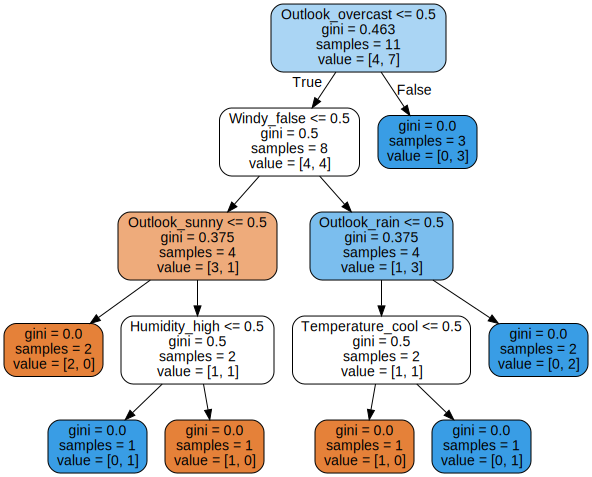

In [53]:
# Function
def class_tree(X,y,features,depth=3):
  # Type of Model
  tree = DecisionTreeClassifier(max_depth=depth)
  # Fitting the Model
  tree.fit(X,y)
  # Displaying Results
  print('R-Squared Score:', tree.score(X, y))
  display(viztree(tree, feature_names=features))
# Showing Tree
features=X.columns
display(viztree(tree, features))